**DSA PROJECT - SOUTH AGRONOMY YIELD PREDICTION AND ANALYSIS USING CROP YIELD DATA SET**

 It offers insights into the relationship between various agronomic factors (e.g., rainfall, fertilizer, pesticide usage) and crop productivity across different states and crop types. Researchers can utilize this data to develop robust machine learning models for crop yield prediction and identify trends in agricultural production.

The Dataset Description is given as follows
  
*   Crop: The name of the crop cultivated.
*   Crop_Year: The year in which the crop was grown.
*   Season: The specific cropping season (e.g., Kharif, Rabi, Whole Year).
*   State: The Indian state where the crop was cultivated.
*   Area: The total land area (in hectares) under cultivation for the specific crop.
*   Production: The quantity of crop production (in metric tons).

*    Annual_Rainfall: The annual rainfall received in the crop-growing region (in mm).
*    Fertilizer: The total amount of fertilizer used for the crop (in kilograms).
*   Pesticide: The total amount of pesticide used for the crop (in kilograms).
*   Yield: The calculated crop yield (production per unit area). *italicized text*




In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load the crop yield dataset to the dataframe
df = pd.read_csv('/content/drive/My Drive/PROJECT DSA_JAN2024_Team1/Datasets/Crop_yield1.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Display the first 10 entries in the dataset
df.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794.0,2051.4,165500.63,539.09,0.420909
5,Dry chillies,1997,Whole Year,NaN,13587.0,9073.0,2051.4,1293074.79,4211.97,0.643636
6,Gram,1997,Rabi,NaN,2979.0,1507.0,2051.4,283511.43,923.49,0.465455
7,Jute,1997,Kharif,Assam,94520.0,904095.0,2051.4,8995468.40,29301.20,9.919565
8,Linseed,1997,Rabi,Assam,10098.0,5158.0,2051.4,961026.66,3130.38,0.461364
9,Maize,1997,Kharif,Assam,19216.0,14721.0,2051.4,1828786.72,NaN,0.615652


In [ ]:
#Display the Datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19681 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19656 non-null  float64
 6   Annual_Rainfall  19683 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19686 non-null  float64
 9   Yield            19641 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
#Display the main attributes like mean,maximum minimum etc for better understanding of the problem
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.965600e+04,19683.000000,1.968900e+04,1.968600e+04,19641.000000
mean,2009.127584,1.799266e+05,1.646354e+07,1437.870775,2.410331e+07,4.885525e+04,80.149406
std,6.498099,7.328287e+05,2.632767e+08,816.991543,9.494600e+07,2.133029e+05,879.369919
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.400000e+03,940.700000,1.880146e+05,3.566700e+02,0.600345
50%,2010.000000,9.317000e+03,1.387400e+04,1247.000000,1.234957e+06,2.421150e+03,1.033000
75%,2015.000000,7.511200e+04,1.232025e+05,1643.700000,1.000385e+07,2.004999e+04,2.396133
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
df.shape

(19689, 10)

In [ ]:
#The data is based on Indian states and our team is about to handle the data of south indian states including UT
df.State.unique()

array(['Assam', nan, 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal',
       'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha',
       'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram',
       'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh',
       'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand',
       'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana',
       'Arunachal Pradesh', 'Sikkim'], dtype=object)

In [ ]:
df.Season.unique()

array(['Whole Year ', 'Kharif     ', 'Rabi       ', 'Autumn     ',
       'Summer     ', 'Winter     '], dtype=object)

In [ ]:
df.Crop_Year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [ ]:
df.Crop.unique()

array(['Arecanut', 'Arhar/Tur', 'Castor seed', 'Coconut ', 'Cotton(lint)',
       'Dry chillies', 'Gram', 'Jute', 'Linseed', 'Maize', 'Mesta',
       'Niger seed', 'Onion', 'Other  Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Rice', 'Sesamum', 'Small millets',
       'Sugarcane', 'Sweet potato', 'Tapioca', 'Tobacco', 'Turmeric',
       'Wheat', 'Bajra', 'Black pepper', 'Cardamom', 'Coriander',
       'Garlic', 'Ginger', 'Groundnut', 'Horse-gram', 'Jowar', 'Ragi',
       'Cashewnut', 'Banana', 'Soyabean', 'Barley', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Other Kharif pulses', 'Safflower',
       'Sannhamp', 'Sunflower', 'Urad', 'Peas & beans (Pulses)',
       'other oilseeds', 'Other Cereals', 'Cowpea(Lobia)',
       'Oilseeds total', 'Guar seed', 'Other Summer Pulses', 'Moth'],
      dtype=object)

In [ ]:
#The main aim of this project is to calculate the yield of agricultural crops in southern state of India.
#Lets create a dataframe that contains southern states Kerala,Tamilnadu,Karnataka,Andhra Pradesh, Telengana and Puducherry
south_indian_states = ['Kerala', 'Karnataka', 'Tamil Nadu', 'Andhra Pradesh', 'Telangana', 'Puducherry']

# Filter the dataset to include only records from the specified states
df2 = df[df['State'].isin(south_indian_states)]

# Display the new dataframe
df2.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
27,Arecanut,1997,Whole Year,Karnataka,93100.0,133342.0,1266.7,8860327.00,28861.00,1.293571
28,Arhar/Tur,1997,Kharif,Karnataka,421810.0,98473.0,1266.7,40143657.70,130761.10,0.268235
29,Bajra,1997,Kharif,Karnataka,301149.0,132056.0,1266.7,28660350.33,93356.19,0.404545
30,Bajra,1997,Summer,Karnataka,820.0,662.0,1266.7,78039.40,254.20,0.810000
31,Black pepper,1997,Kharif,Karnataka,3825.0,924.0,1266.7,364025.25,1185.75,0.437500


In [ ]:
df2.shape

(5115, 10)

# **Exploratory Data Analysis**

In [ ]:
#The Univariate and Bivariate Analysis of the Features are given below

**AREA**

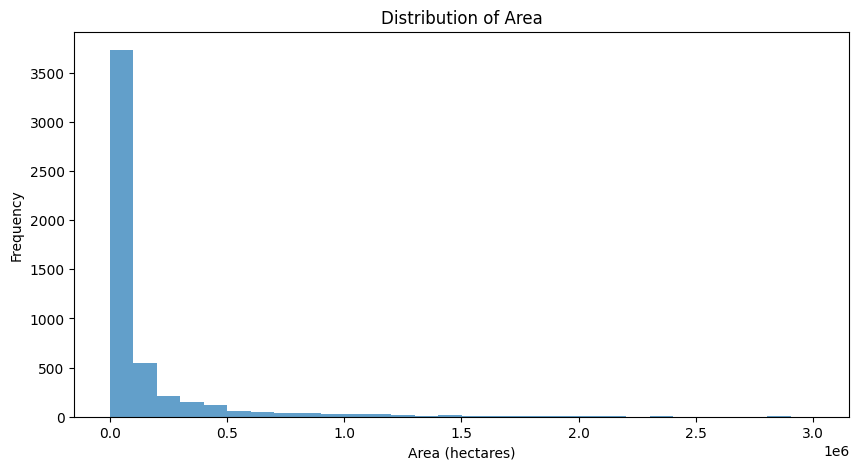

In [ ]:
# Histograms
plt.figure(figsize=(10,5))
plt.hist(df2['Area'], bins=30, alpha=0.7)
plt.title('Distribution of Area')
plt.xlabel('Area (hectares)')
plt.ylabel('Frequency')

plt.show()




*   The majority of the area values are very small, concentrated around 0 to 0.5 million hectares.

*   The frequency rapidly decreases as the area increases. This suggests that most of the data points have relatively small area values, and very few data points have large area values.


*   The histogram shows a long tail towards the right, indicating that while larger areas do exist, they are much less common.





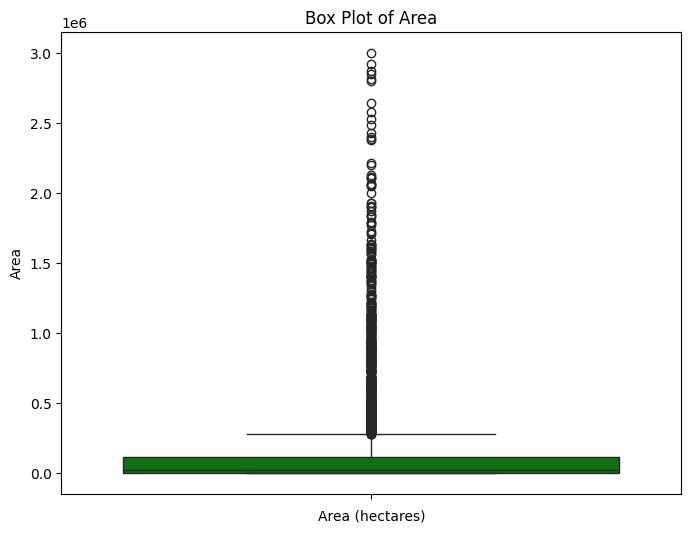

In [ ]:
#Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(df2['Area'],color='g')

plt.title('Box Plot of Area')
plt.xlabel('Area (hectares)')
plt.show()




Central Tendency:

The box plot shows that the median (central line within the box) is very close to the lower quartile (Q1), indicating that a large proportion of the data points are concentrated at lower 'Area' values. Spread:

The interquartile range (IQR), which is the height of the box, represents the middle 50% of the data. The relatively short height of the box compared to the range of values indicates that most data points are clustered together with few large values extending far out. Outliers:

There are numerous outliers represented by the dots above the whiskers of the box plot. These outliers are the data points that are significantly higher than the upper quartile (Q3 + 1.5*IQR).


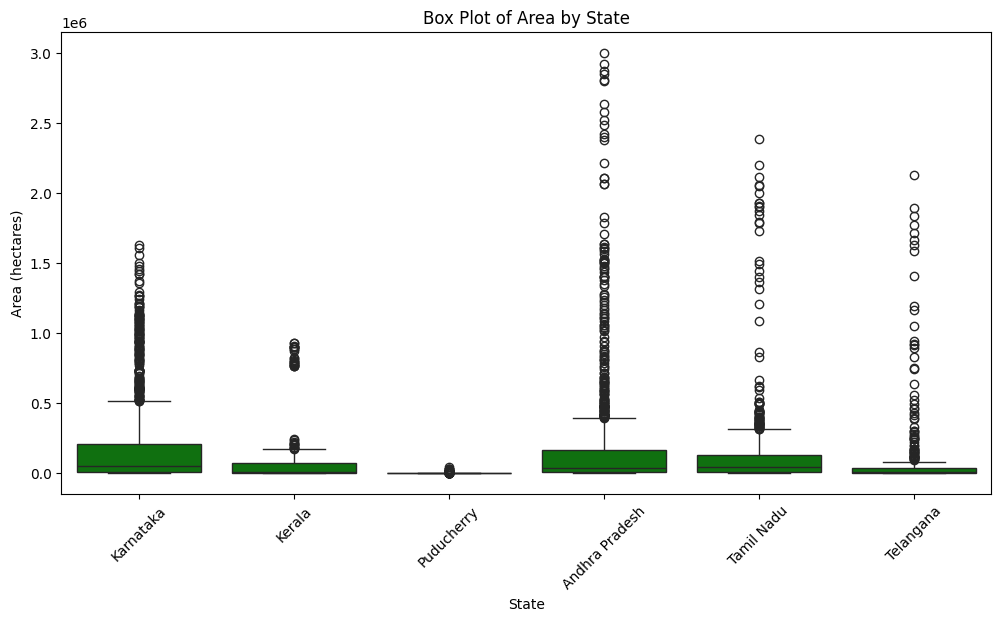

In [ ]:
#Box plot by states
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Area', data=df2,color='g')

plt.title('Box Plot of Area by State')
plt.xlabel('State')
plt.ylabel('Area (hectares)')
plt.xticks(rotation=45)
plt.show()

Distribution and Outliers:

The plot shows a large number of outliers for most states, indicating that there are some very large crop areas compared to the rest of the data.
The presence of outliers is more prominent in certain states, suggesting higher variability in crop areas within those states.
Interquartile Range (IQR):

The blue boxes represent the interquartile range (IQR), which is the middle 50% of the data.
States with larger IQRs have more variability in their crop areas, while states with smaller IQRs have more consistent crop areas.
Median Crop Area:

The horizontal line within each box represents the median crop area for each state.
Comparing the medians across states can provide an idea of which states generally have larger or smaller crop areas.
State-wise Comparison:

Some states have significantly higher crop areas than others, as seen from the higher medians and larger IQRs.
States with more outliers and higher values (above the boxes) indicate that they have some very large farms or agricultural plots.
Data Spread:

The whiskers (lines extending from the boxes) show the range of the data excluding the outliers.
States with longer whiskers have a broader range of crop areas, while states with shorter whiskers have more tightly clustered data.



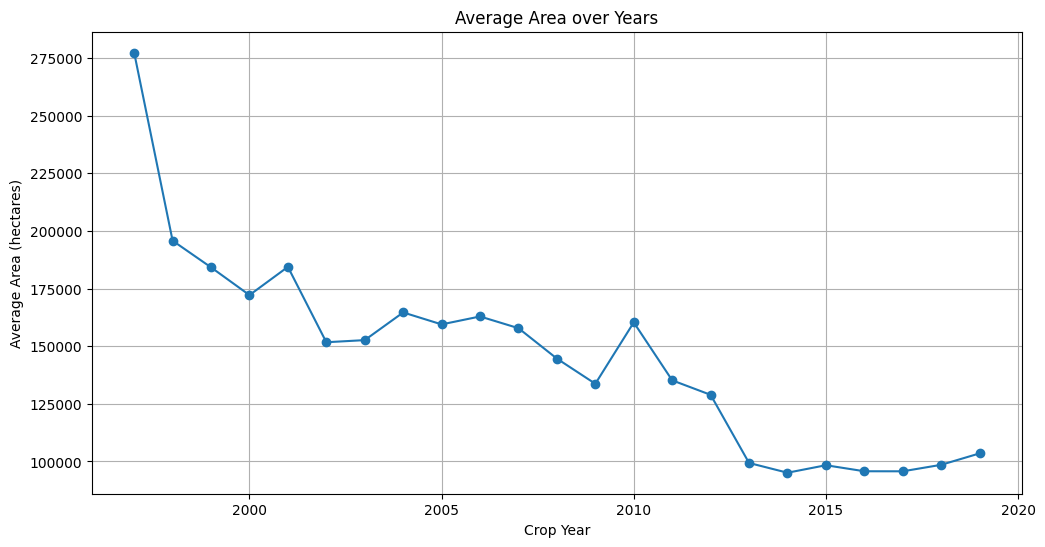

In [ ]:
#line plot
# Aggregate the Data
area_yearly = df2.groupby('Crop_Year')['Area'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(area_yearly['Crop_Year'], area_yearly['Area'], marker='o', linestyle='-')
plt.title('Average Area over Years')
plt.xlabel('Crop Year')
plt.ylabel('Average Area (hectares)')
plt.grid(True)
plt.show()

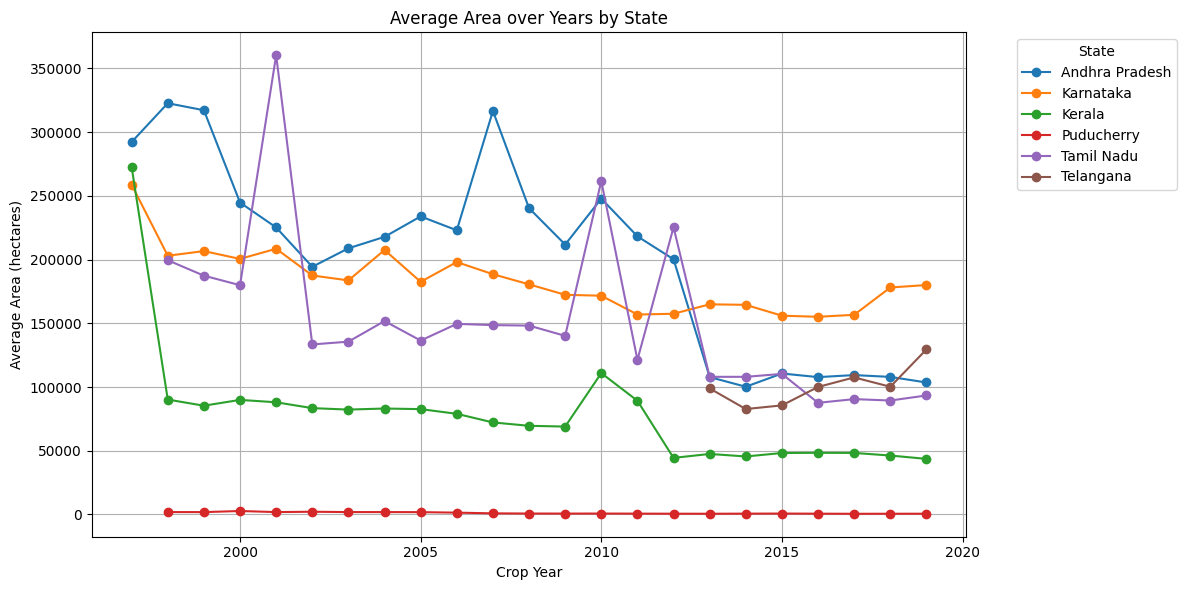

In [ ]:
area_yearly_state = df2.groupby(['Crop_Year', 'State'])['Area'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))

for state in area_yearly_state.columns:
    plt.plot(area_yearly_state.index, area_yearly_state[state], marker='o', linestyle='-', label=state)

plt.title('Average Area over Years by State')
plt.xlabel('Crop Year')
plt.ylabel('Average Area (hectares)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**General Trends:**
**Andhra Pradesh:**

Initially has a high average area, but shows a declining trend over the years.
Despite fluctuations, the trend seems to stabilize post-2010.

**Karnataka:**

The average area shows a slight decrease over the years.
The trend is relatively stable compared to other states with fewer fluctuations.

**Kerala:**

Consistently has one of the lowest average areas across the years.
There is a noticeable dip around the year 2000, after which the area remains consistently low.

**Puducherry:**

Shows a very low average area consistently over the years.
There is almost no variation, indicating very small agricultural areas.

**Tamil Nadu:**

Exhibits a fluctuating trend with several peaks and troughs.
After 2005, the average area decreases significantly and remains low.

**Telangana:**

Similar to Tamil Nadu, it has a high initial average area which decreases over time.
The trend shows significant fluctuations.

**Key Observations:**
Declining Trends: Andhra Pradesh, Tamil Nadu, and Telangana show a general declining trend in average area over the years. This could be due to urbanization, changes in agricultural practices, or other socio-economic factors.

**Stable States:**
 Karnataka and Kerala have relatively stable trends with less fluctuation. Kerala's average area remains consistently low, which could indicate smaller landholdings or different agricultural practices compared to other states.

**Minimal Variation:**
 Puducherry consistently has a very low average area with minimal variation, indicating small and consistent agricultural plots.

**PRODUCTION**

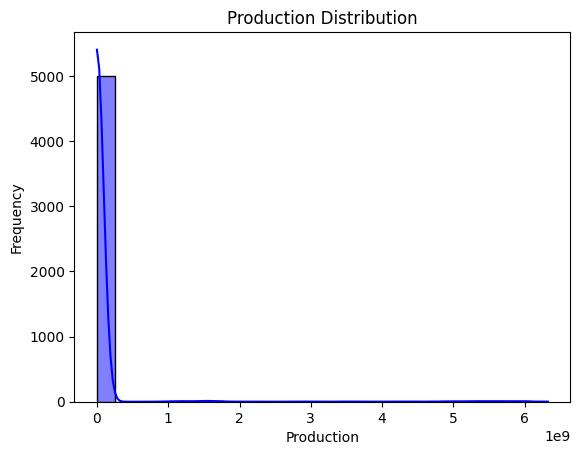

In [ ]:
#Histogram
sns.histplot(df2['Production'],kde=True,bins=25, color='blue')
plt.title('Production Distribution')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()



Highly Skewed Distribution:

The distribution is heavily right-skewed, with the majority of the data concentrated towards the lower end of the production scale. This suggests that most production values are relatively low, with only a few very high values.


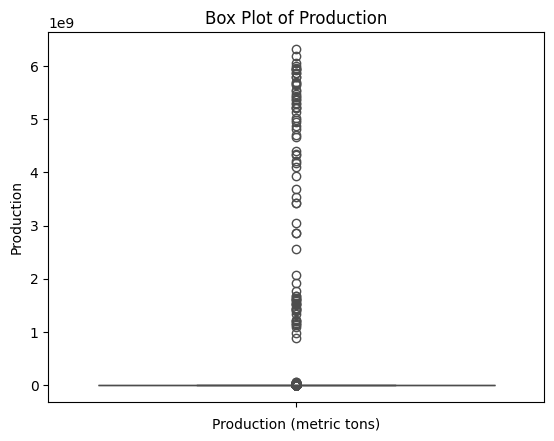

In [ ]:
#Box Plot

sns.boxplot(df2['Production'],color='r')

plt.title('Box Plot of Production')
plt.xlabel('Production (metric tons)')
plt.show()

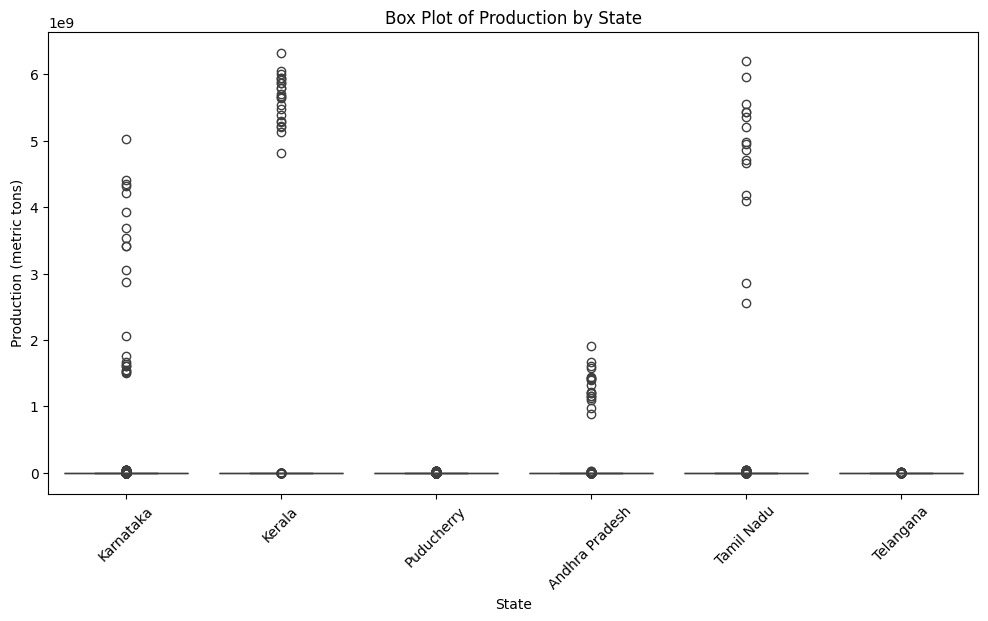

In [ ]:
#Box plot by states
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Production', data=df2)

plt.title('Box Plot of Production by State')
plt.xlabel('State')
plt.ylabel('Production (metric tons)')
plt.xticks(rotation=45)
plt.show()

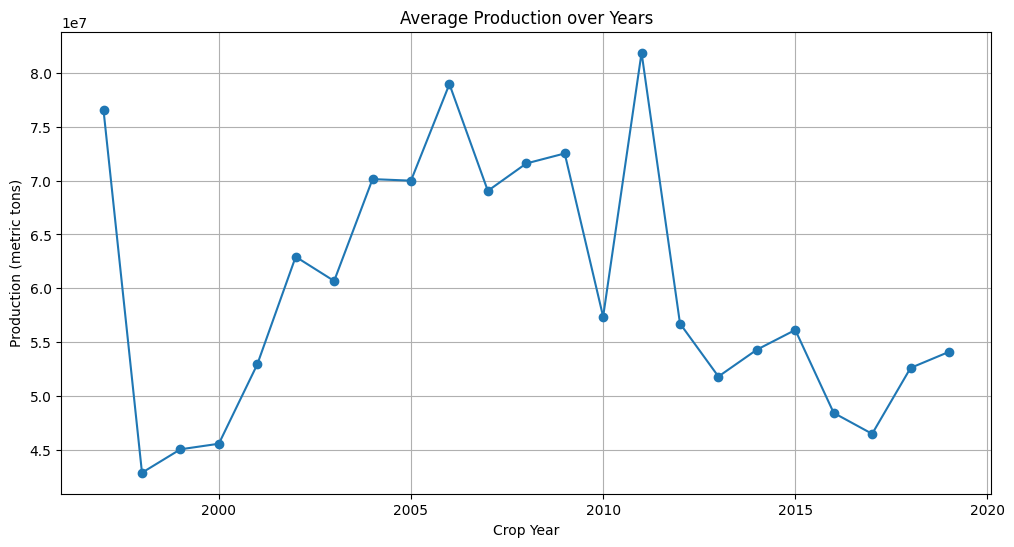

In [ ]:
#line plot
# Aggregate the Data
production_yearly = df2.groupby('Crop_Year')['Production'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.plot(production_yearly['Crop_Year'], production_yearly['Production'], marker='o', linestyle='-')
plt.title('Average Production over Years')
plt.xlabel('Crop Year')
plt.ylabel('Production (metric tons)')
plt.grid(True)
plt.show()

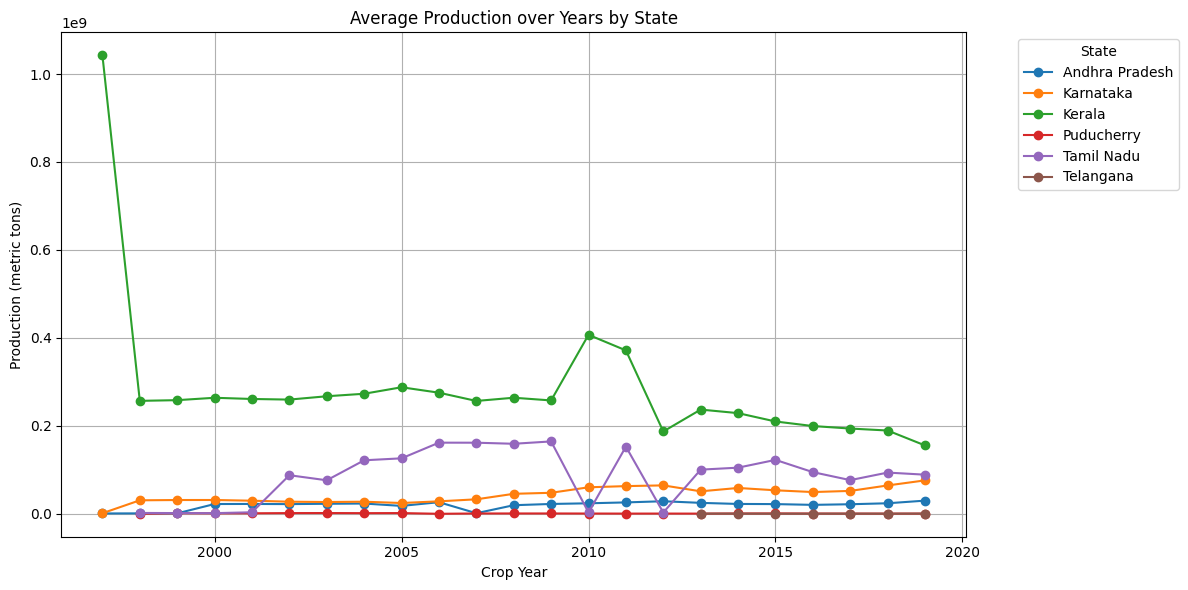

In [ ]:
production_yearly_state = df2.groupby(['Crop_Year', 'State'])['Production'].mean().unstack()

plt.figure(figsize=(12, 6))

for state in production_yearly_state.columns:
    plt.plot(production_yearly_state.index, production_yearly_state[state], marker='o', linestyle='-', label=state)

plt.title('Average Production over Years by State')
plt.xlabel('Crop Year')
plt.ylabel('Production (metric tons)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Annual Rainfall**

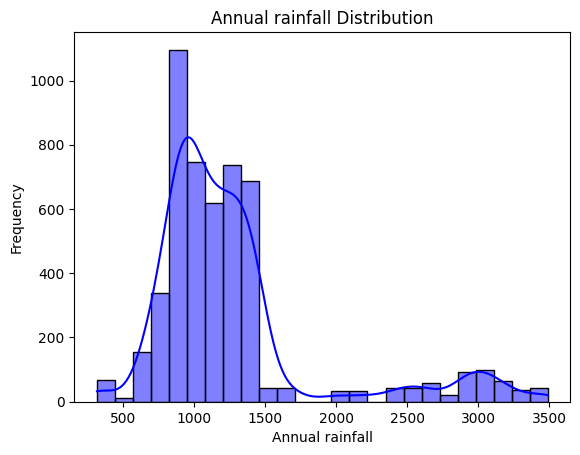

In [ ]:
#Histogram
sns.histplot(df2['Annual_Rainfall'],kde=True,bins=25, color='blue')
plt.title('Annual rainfall Distribution')
plt.xlabel('Annual rainfall')
plt.ylabel('Frequency')
plt.show()



**Data Distribution:** The distribution is positively skewed, with a longer tail on the right side. This indicates that while most years experience moderate to low rainfall, there are occasional years with very high rainfall.

**Peak Frequency:** The highest frequency of annual rainfall appears to be around the 1000 mm mark, suggesting that this is the most common annual rainfall amount.

**Outliers:** There are some noticeable outliers, particularly on the higher end of the rainfall spectrum (above 2500 mm). These could represent unusually wet years.

**Frequency Range:** The frequency of annual rainfall sharply declines beyond 1500 mm, indicating that such high rainfall amounts are relatively rare.

**Data Spread:** The data spread is wide, ranging from around 100 mm to 3500 mm of annual rainfall.


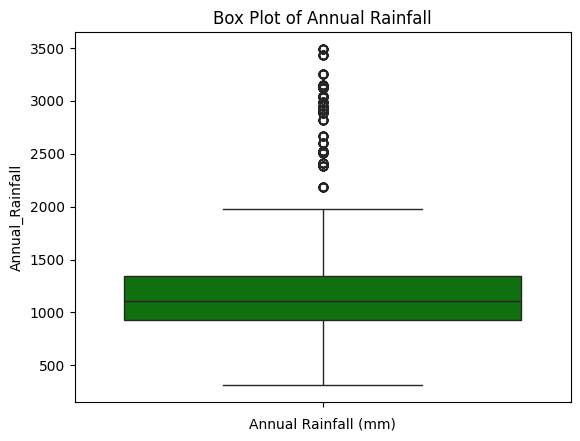

In [ ]:
#Box Plot

sns.boxplot(df2['Annual_Rainfall'],color='g')

plt.title('Box Plot of Annual Rainfall')
plt.xlabel('Annual Rainfall (mm)')
plt.show()

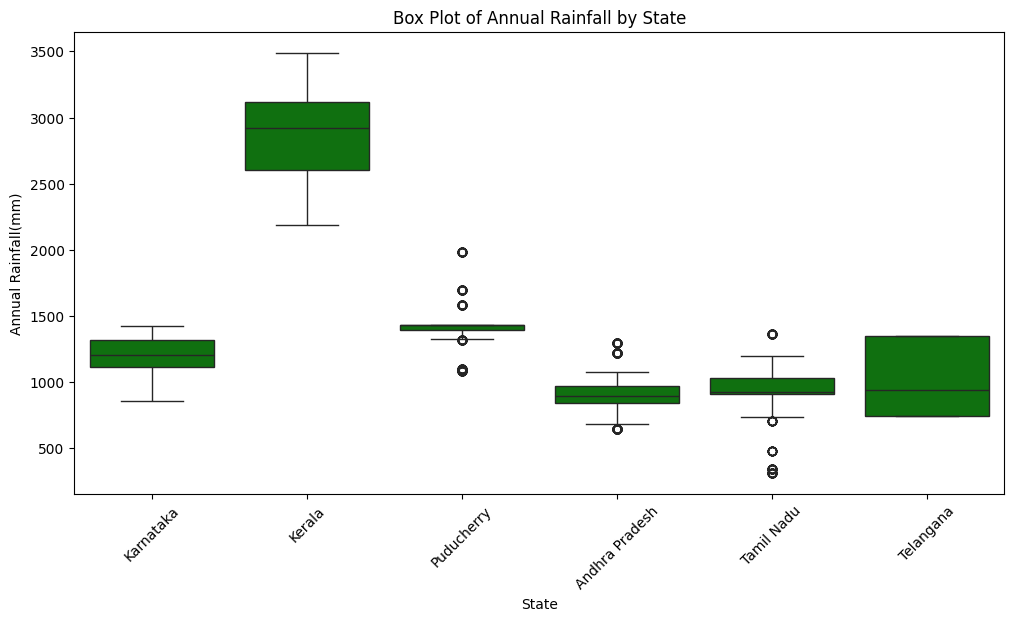

In [ ]:

#Box plot by states
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Annual_Rainfall', data=df2,color='g')

plt.title('Box Plot of Annual Rainfall by State')
plt.xlabel('State')
plt.ylabel('Annual Rainfall(mm)')
plt.xticks(rotation=45)
plt.show()

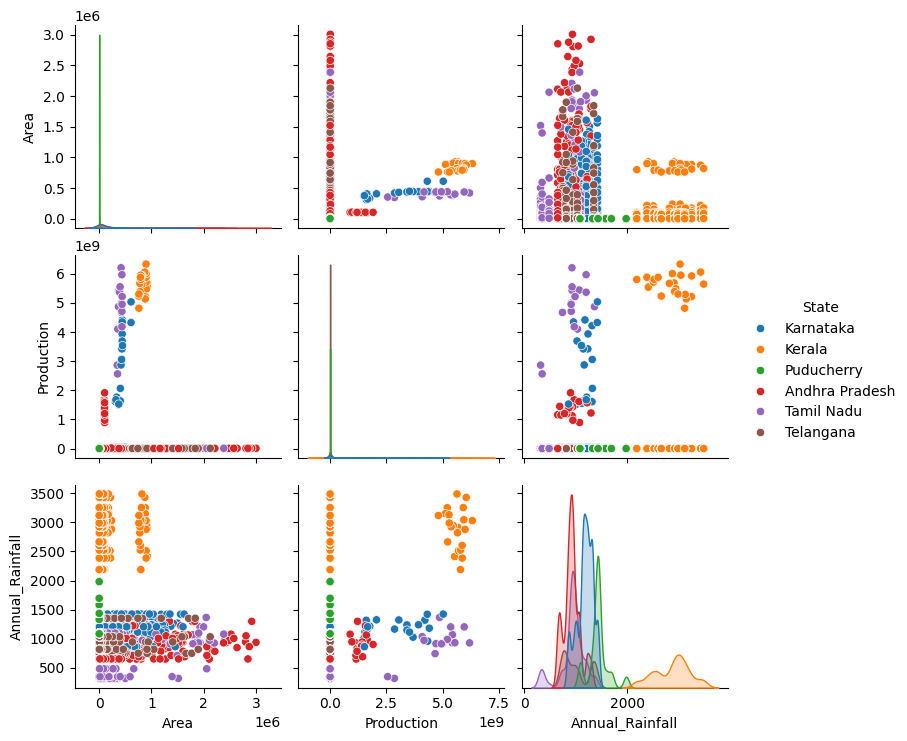

In [ ]:
sns.pairplot(df2, vars=['Area', 'Production', 'Annual_Rainfall'], hue='State', diag_kind='kde')
plt.show()



**Area over Years:**

The data points for the area (in hectares) seem to show some variation across different states and years. Kerala, Puducherry, and Tamil Nadu seem to have smaller areas under crop cultivation compared to states like Andhra Pradesh and Karnataka.
**Production over Years:**

Production (in metric tons) varies widely among states, with states like Andhra Pradesh and Karnataka showing higher production levels. There is a noticeable trend where some states consistently have higher production than others over the years. Annual Rainfall over Years:

Annual rainfall (in mm) shows significant variability across the states and years. States like Kerala and Karnataka receive higher annual rainfall compared to others.


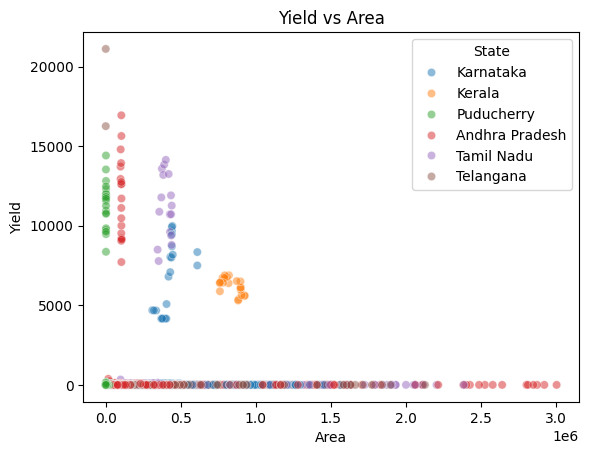

In [ ]:

sns.scatterplot(x='Area', y='Yield', data=df2, hue='State', alpha=0.5)

plt.title('Yield vs Area')
plt.xlabel('Area')
plt.ylabel('Yield')

plt.show()

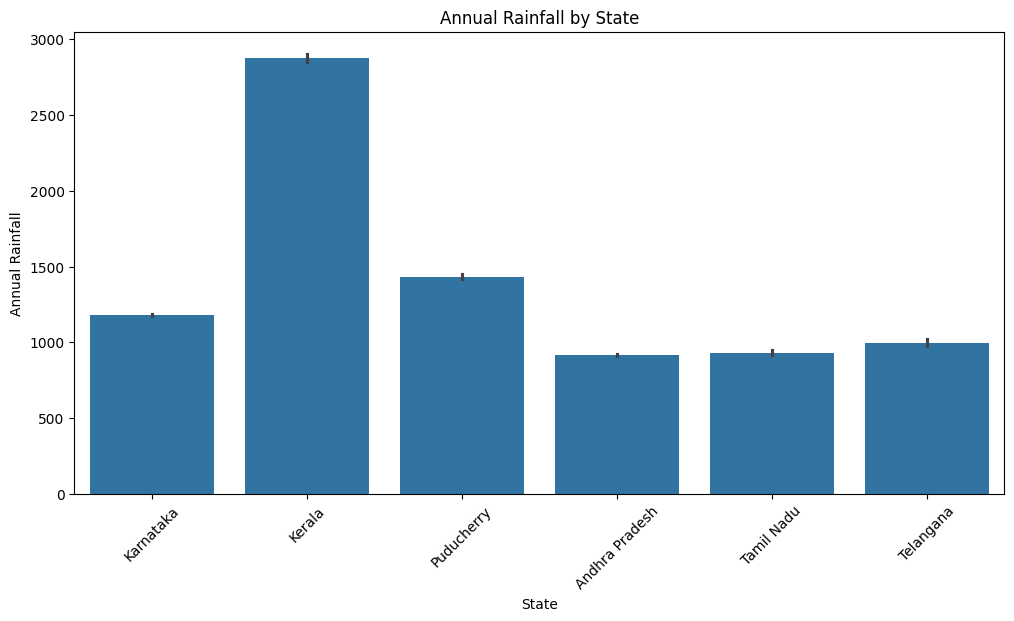

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Annual_Rainfall', data=df2)

plt.title('Annual Rainfall by State')
plt.xlabel('State')
plt.ylabel('Annual Rainfall')
plt.xticks(rotation=45)

plt.show()

Kerala has maximum annual rainfall and andra pradesh has minimum

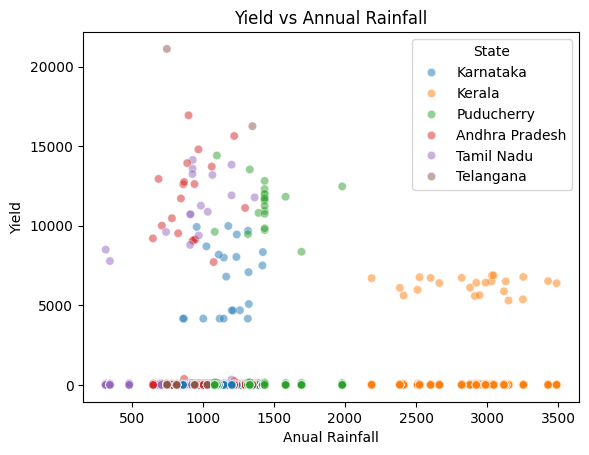

In [ ]:
sns.scatterplot(x='Annual_Rainfall', y='Yield', data=df2, hue='State', alpha=0.5)

plt.title('Yield vs Annual Rainfall')
plt.xlabel('Anual Rainfall')
plt.ylabel('Yield')

plt.show()

### **Fertilizer and Pesticide**

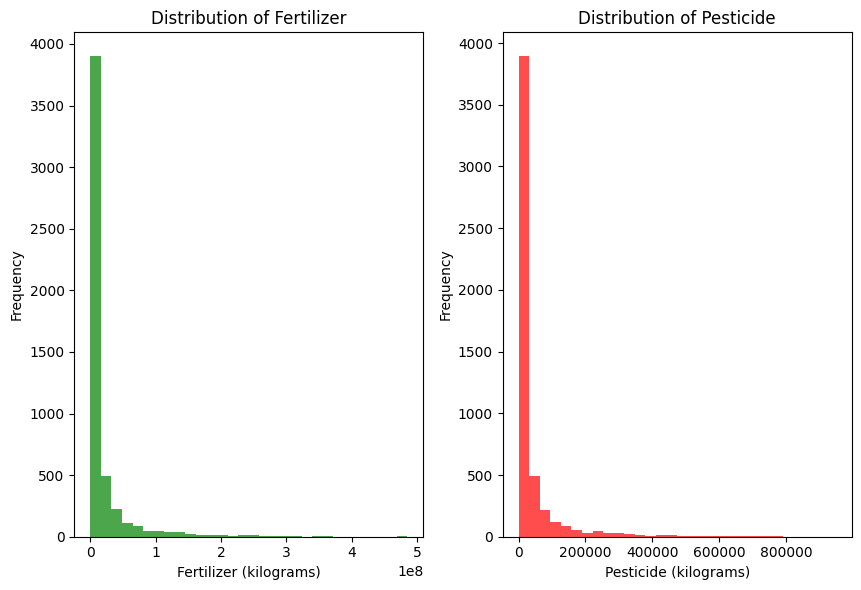

In [ ]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 3, 1)
plt.hist(df2['Fertilizer'], bins=30, alpha=0.7, color='g')
plt.title('Distribution of Fertilizer')
plt.xlabel('Fertilizer (kilograms)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df2['Pesticide'], bins=30, alpha=0.7, color='r')
plt.title('Distribution of Pesticide')
plt.xlabel('Pesticide (kilograms)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The fertilizer and pesticide value distributions exhibit highly right-skewed distributions.
This suggests that most agricultural practices result in relatively low production, fertilizer usage, and pesticide usage, with a smaller number of instances showing significantly higher values.

Text(0, 0.5, 'Pesticide Usage(Kilograms)')

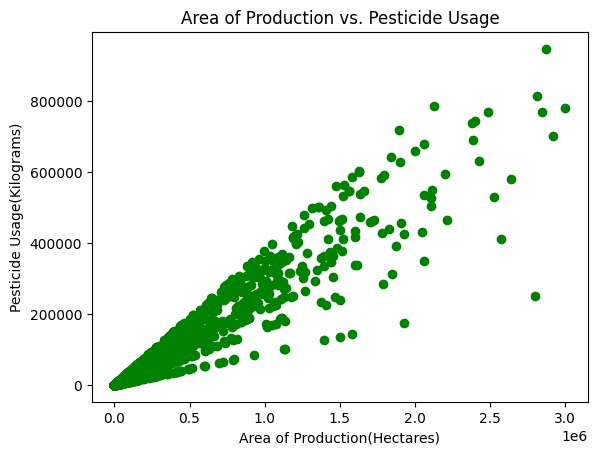

In [ ]:
#Bi-Variate Analysis of the Area Vs Pesticide and Area Vs Fertilizers
#create scatterplot of Area vs.Pesticides
plt.scatter(df2.Area, df2.Pesticide,c='green')
plt.title('Area of Production vs. Pesticide Usage')
plt.xlabel('Area of Production(Hectares)')
plt.ylabel('Pesticide Usage(Kilograms)')



*   -The graph shows a positive correlation between the area of production (hectares) and pesticide usage (kilograms). As the area of production increases, pesticide usage also increases.

*   -Most of the data points are concentrated towards the lower end of the area of production, indicating that smaller production areas are more common but still use a significant amount of pesticides.

*   -There is a wide range of pesticide usage for smaller areas of production, indicating variability in farming practices or crop types. Larger areas show a more consistent (higher) pesticide usage.






Text(0, 0.5, 'Fertilizer Usage(Kilograms)')

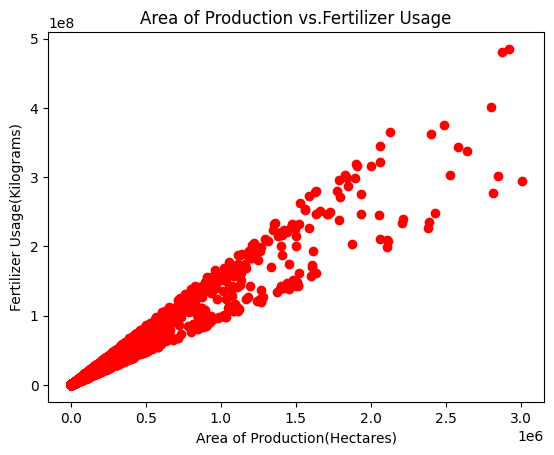

In [ ]:
#create scatterplot of Area vs.Fertilizers
plt.scatter(df2.Area, df2.Fertilizer,c='red')
plt.title('Area of Production vs.Fertilizer Usage')
plt.xlabel('Area of Production(Hectares)')
plt.ylabel('Fertilizer Usage(Kilograms)')



*   The graph demonstrates a positive correlation between the area of production (hectares) and fertilizer usage (kilograms). As the area of production increases, fertilizer usage also increases.
*   The data points show a similar triangular distribution as the first graph, with a concentration of points towards the lower end of the production area. This suggests that smaller production areas are more frequent but still have varied fertilizer usage.

*   Fertilizer usage reaches up to 5e8 kilograms, which is much higher than the pesticide usage. This indicates that fertilizer usage might be more intense or widespread.


*   The graph has several outliers where fertilizer usage is significantly higher than the majority of the data points for similar production areas. This could indicate regions with particularly intensive agricultural practices or different crop types requiring more fertilizer inputs.




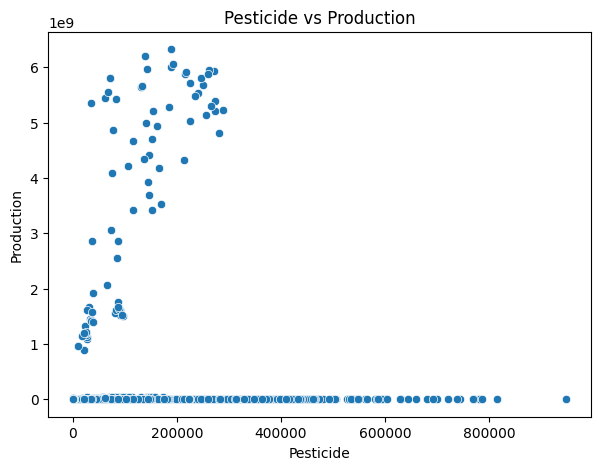

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df2, x='Pesticide', y='Production')
plt.title('Pesticide vs Production')
plt.xlabel('Pesticide')
plt.ylabel('Production')
plt.show()

Most observations involve low levels of pesticide application, highlighting a common practice of minimal pesticide use.
A significant number of high production values are associated with moderate to high pesticide usage, indicating effectiveness up to a certain level

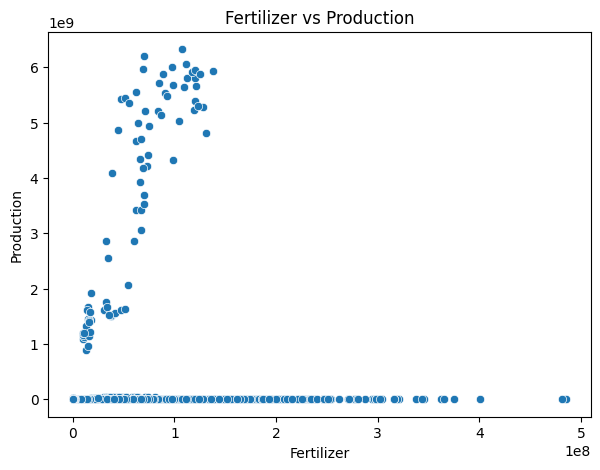

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df2, x='Fertilizer', y='Production')
plt.title('Fertilizer vs Production')
plt.xlabel('Fertilizer')
plt.ylabel('Production')
plt.show()

observations involve low levels of fertilizer application
A significant number of high production values are associated with moderate fertilizer usage, indicating effectiveness up to a certain level.

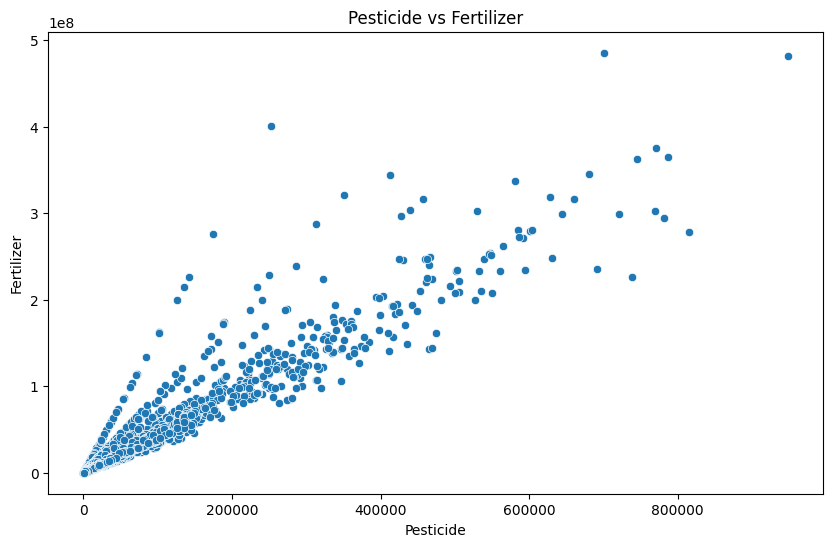

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Pesticide', y='Fertilizer')
plt.title('Pesticide vs Fertilizer')
plt.xlabel('Pesticide')
plt.ylabel('Fertilizer')
plt.show()

Increased pesticide usage is generally associated with increased fertilizer usage, indicating that higher input levels often go hand in hand.

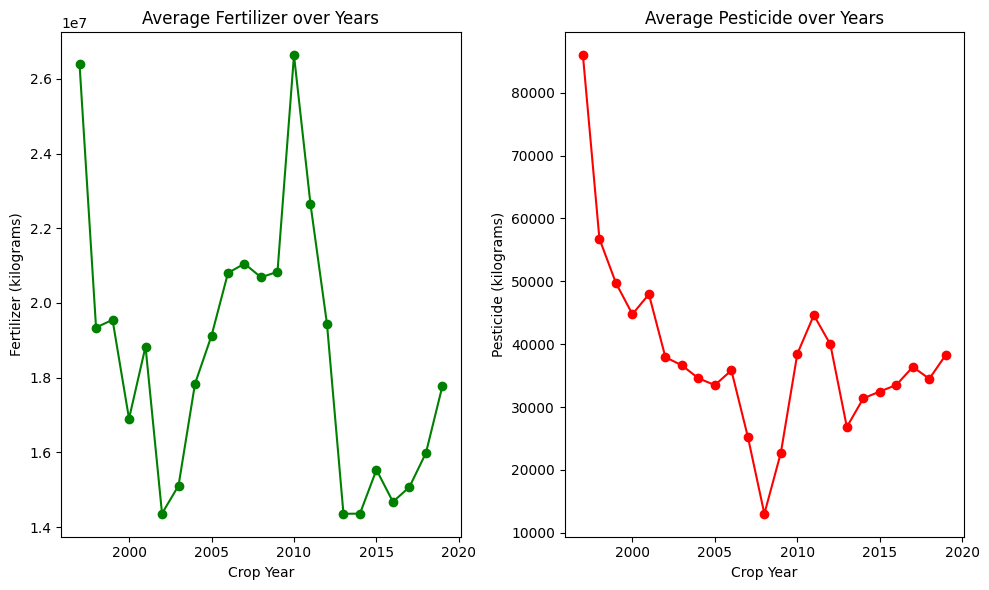

In [ ]:
# Group by Crop Year and calculate mean
yearly_data = df2.groupby('Crop_Year').mean(numeric_only=True)


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(yearly_data.index, yearly_data['Fertilizer'], marker='o', color='g')
plt.title('Average Fertilizer over Years')
plt.xlabel('Crop Year')
plt.ylabel('Fertilizer (kilograms)')

plt.subplot(1, 2, 2)
plt.plot(yearly_data.index, yearly_data['Pesticide'], marker='o', color='r')
plt.title('Average Pesticide over Years')
plt.xlabel('Crop Year')
plt.ylabel('Pesticide (kilograms)')

plt.tight_layout()
plt.show()

**Crop wise Analysis**

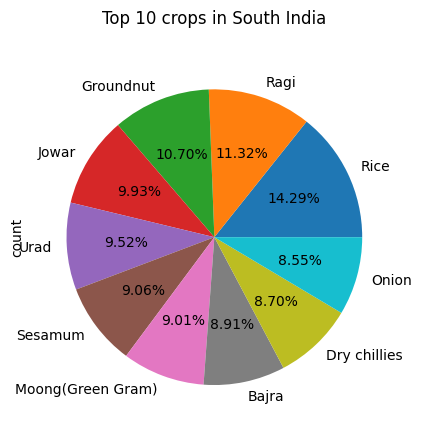

In [ ]:
#create a pie chart to visualize the top 10 crop in South India
df2['Crop'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',autopct ='%1.2f%%')
plt.title('Top 10 crops in South India\n')
plt.show()

Rice,Ragi,Groundnut,Jowar and Urad are the 5 major crops that wildly produced in the southIndia

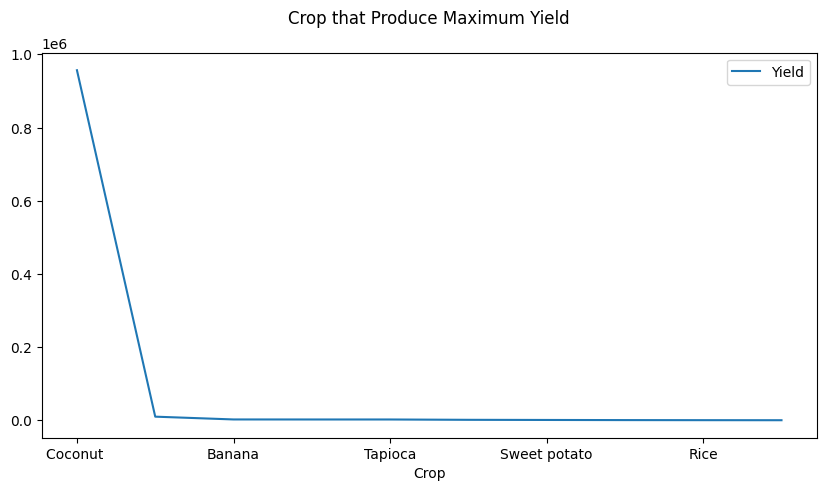

In [ ]:
#Crop that Produce Maximum Yield
Max_Yiled_Crop=df2.groupby('Crop').sum().sort_values(by='Yield',ascending=False).head(10)
Max_Yiled_Crop = Max_Yiled_Crop.reset_index()
Max_Yiled_Crop.plot(x='Crop',y='Yield',figsize=(10,5))
#plot(kind='pie',autopct ='%1.2f%%')
#.plot(x='Crop',y='Yield',kind='pie',figsize=(10,5))
plt.title('Crop that Produce Maximum Yield\n')
plt.show()

Coconut is giving maximum yield as per the dataset

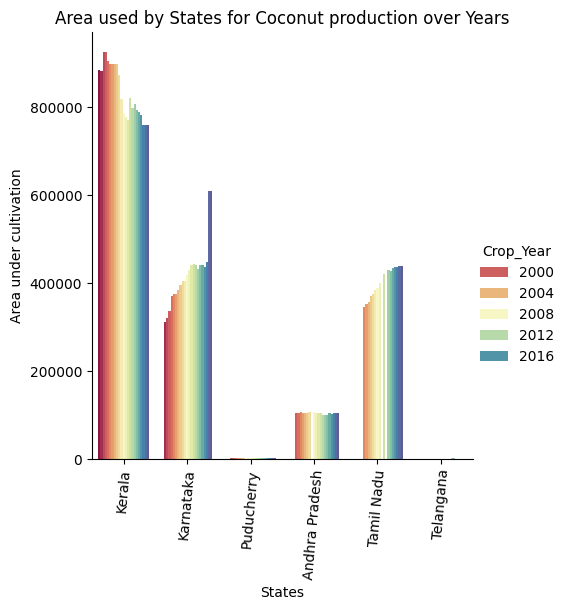

In [ ]:
df_c = df2[df2['Crop']=='Coconut '].reset_index(drop=True)
df_c
sns.catplot(data=df_c, x="State", y="Area",hue="Crop_Year",palette='Spectral',kind="bar")

plt.xlabel('States')
plt.ylabel('Area under cultivation')
plt.title('Area used by States for Coconut production over Years')
plt.xticks(rotation=85)
plt.show()

Kerala comes in first place for area used for producing Coconuts but it shows decreasing year by year


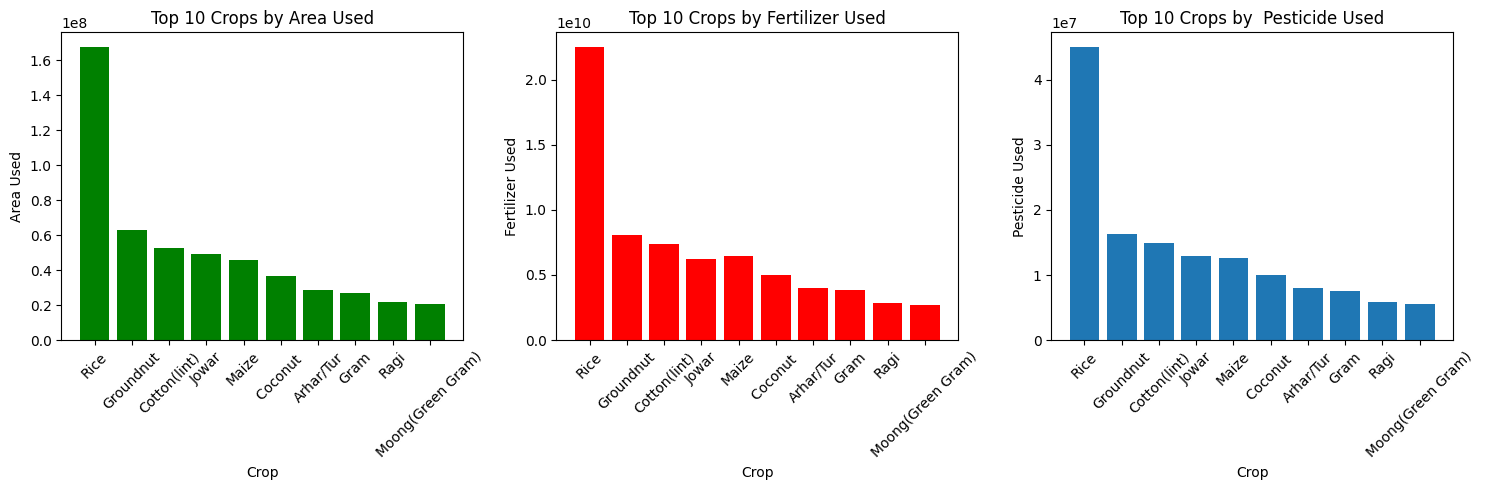

In [ ]:
Max_Yiled_Crop=df2.groupby('Crop').sum().sort_values(by='Area',ascending=False).head(10).reset_index()
# Plotting the first subplot (Crop vs Area Used)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(Max_Yiled_Crop['Crop'], Max_Yiled_Crop['Area'], color='green')
axs[0].set_title('Top 10 Crops by Area Used')
axs[0].set_xlabel('Crop')
axs[0].set_ylabel('Area Used')
axs[0].tick_params(axis='x', rotation=45)

# Plotting the second subplot (Crop vs Fertilizer Used)
axs[1].bar(Max_Yiled_Crop['Crop'], Max_Yiled_Crop['Fertilizer'], color='red')
axs[1].set_title('Top 10 Crops by Fertilizer Used')
axs[1].set_xlabel('Crop')
axs[1].set_ylabel('Fertilizer Used')
axs[1].tick_params(axis='x', rotation=45)
#axs[1].set_xticks(rotation=45)

# Plotting the third subplot (Crop vs Pesticide Used)
axs[2].bar(Max_Yiled_Crop['Crop'], Max_Yiled_Crop['Pesticide'])
axs[2].set_title('Top 10 Crops by  Pesticide Used')
axs[2].set_xlabel('Crop')
axs[2].set_ylabel('Pesticide Used')
axs[2].tick_params(axis='x', rotation=45)


plt.tight_layout()  # Ensures plots are properly spaced
plt.show()

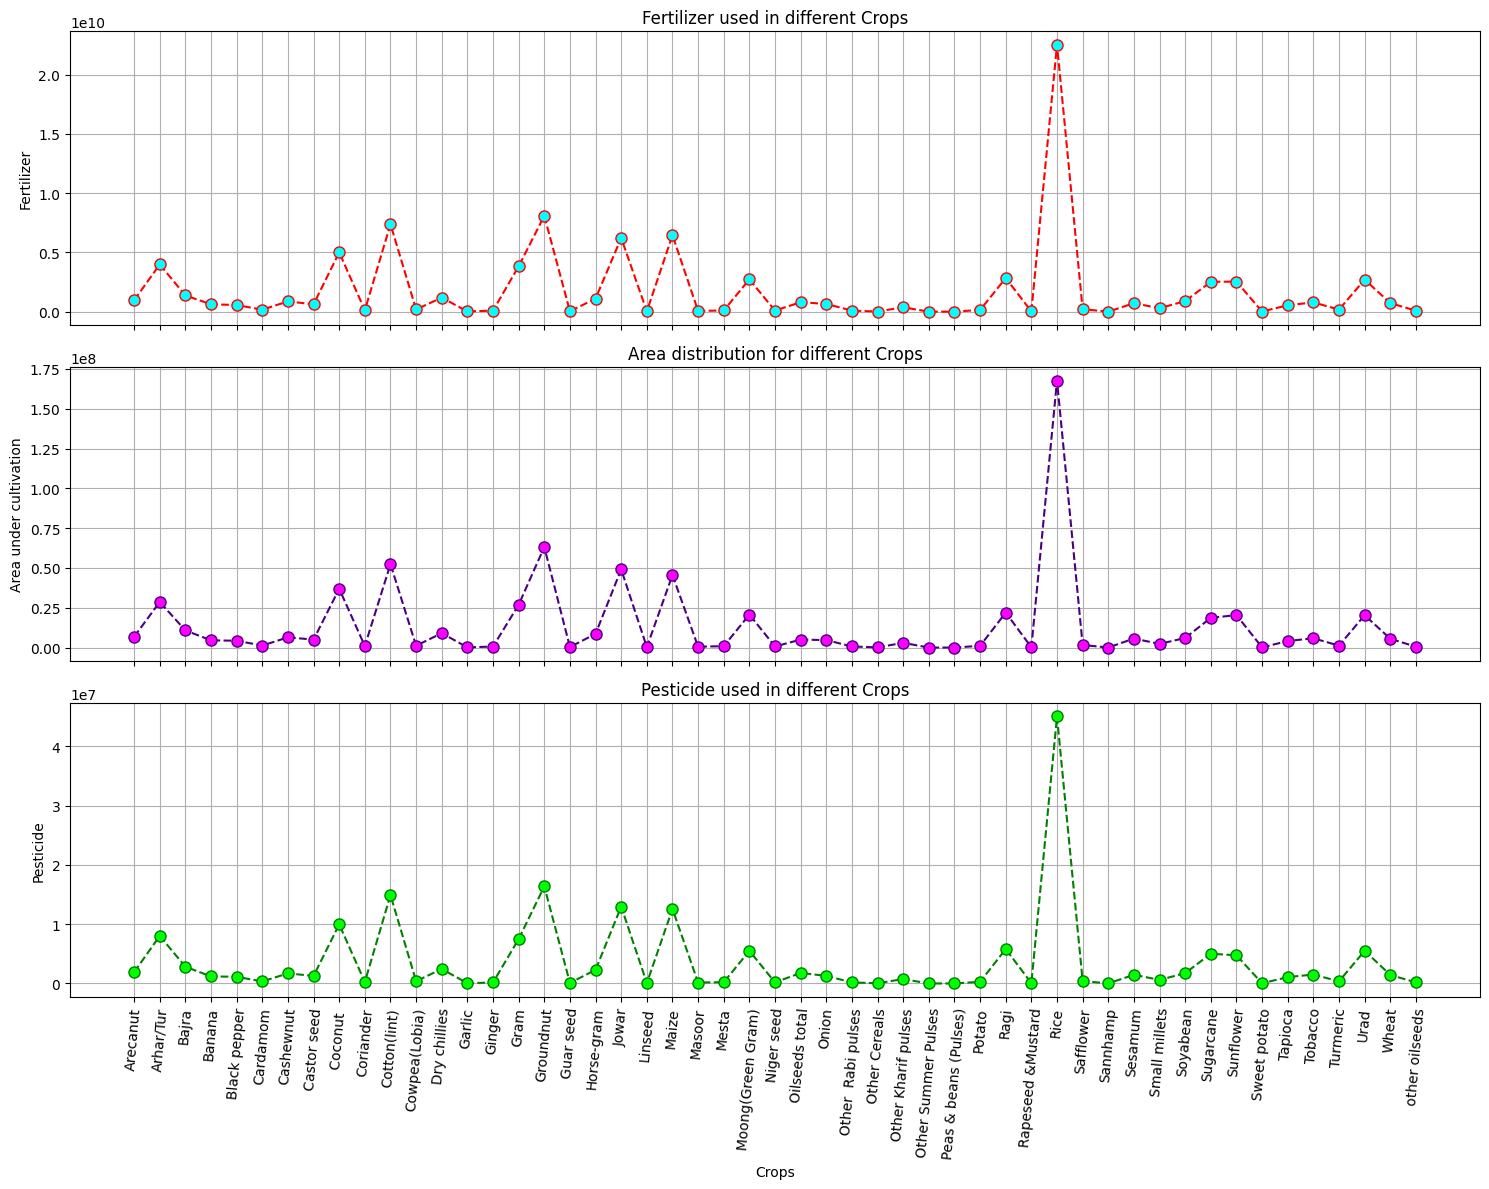

In [ ]:

df_ynz = df2[df2['Yield'] > 0]  # Filter for yield greater than zero
df_crop = df_ynz.groupby('Crop').sum()  # Group by crop and sum numeric columns

# Create subplots with a common x-axis
fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Plot for fertilizer used
axs[0].plot(df_crop.index, df_crop['Fertilizer'], color='red', linestyle='dashed', marker='o',
            markersize=8, markerfacecolor='cyan')
axs[0].set_ylabel('Fertilizer')
axs[0].set_title('Fertilizer used in different Crops')
axs[0].grid(True)

# Plot for area under cultivation
axs[1].plot(df_crop.index, df_crop['Area'], color='indigo', linestyle='dashed', marker='o',
            markersize=8, markerfacecolor='fuchsia')
axs[1].set_ylabel('Area under cultivation')
axs[1].set_title('Area distribution for different Crops')
axs[1].grid(True)

# Plot for pesticide used
axs[2].plot(df_crop.index, df_crop['Pesticide'], color='green', linestyle='dashed', marker='o',
            markersize=8, markerfacecolor='lime')
axs[2].set_xlabel('Crops')
axs[2].set_ylabel('Pesticide')
axs[2].set_title('Pesticide used in different Crops')
axs[2].grid(True)

# Rotate x-axis labels for all subplots
plt.xticks(rotation=85)

# Adjust layout
plt.tight_layout()
plt.show()

Kerala comes in first place for area used for producing Coconuts but it shows decreasing year by year


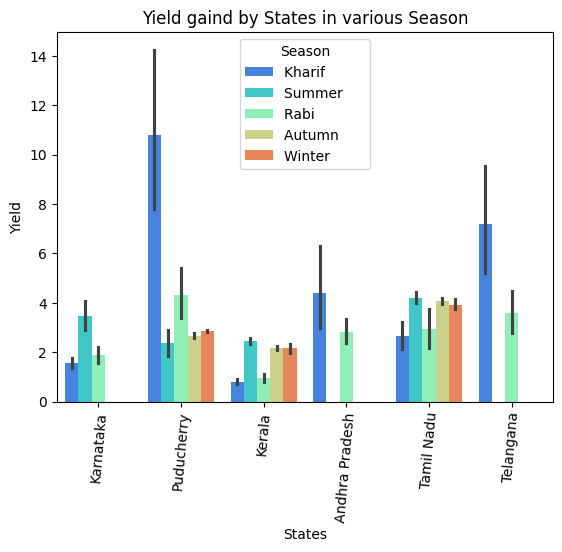

In [ ]:
cleand_Seas = df2[df2['Season']!='Whole Year ']

cleand_season = cleand_Seas.groupby('Season').sum()


sns.barplot(data=cleand_Seas, x="State", y="Yield",hue="Season",palette='rainbow')

plt.xlabel('States')
plt.ylabel('Yield')
plt.title('Yield gaind by States in various Season')
plt.xticks(rotation=85)
plt.show()